In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
logs1 = """
2020-08-01 13:38:14,312 INFO     total: 1000   cachehits: 171   cachemisses: 828
2020-08-01 13:38:25,690 INFO     total: 2000   cachehits: 289   cachemisses: 1710
2020-08-01 13:38:42,238 INFO     total: 3000   cachehits: 414   cachemisses: 2585
2020-08-01 13:39:03,632 INFO     total: 4000   cachehits: 555   cachemisses: 3444
2020-08-01 13:39:26,571 INFO     total: 5000   cachehits: 726   cachemisses: 4273
2020-08-01 13:39:50,488 INFO     total: 6000   cachehits: 888   cachemisses: 5111
2020-08-01 13:40:18,803 INFO     total: 7000   cachehits: 1061   cachemisses: 5938
2020-08-01 13:40:54,391 INFO     total: 8000   cachehits: 1225   cachemisses: 6774
2020-08-01 13:41:57,361 INFO     total: 9000   cachehits: 1399   cachemisses: 7600
2020-08-01 13:42:36,910 INFO     total: 10000   cachehits: 1625   cachemisses: 8374
2020-08-01 13:43:06,822 INFO     total: 11000   cachehits: 1843   cachemisses: 9156
2020-08-01 13:43:42,711 INFO     total: 12000   cachehits: 2072   cachemisses: 9927
2020-08-01 13:44:41,210 INFO     total: 13000   cachehits: 2285   cachemisses: 10714
2020-08-01 13:45:35,866 INFO     total: 14000   cachehits: 2481   cachemisses: 11518
2020-08-01 13:46:14,450 INFO     total: 15000   cachehits: 2773   cachemisses: 12226
2020-08-01 13:47:04,930 INFO     total: 16000   cachehits: 2935   cachemisses: 13064
2020-08-01 13:47:52,105 INFO     total: 17000   cachehits: 3141   cachemisses: 13858
2020-08-01 13:48:50,480 INFO     total: 18000   cachehits: 3297   cachemisses: 14702
2020-08-01 13:49:41,168 INFO     total: 19000   cachehits: 3549   cachemisses: 15450
2020-08-01 13:50:26,759 INFO     total: 20000   cachehits: 3872   cachemisses: 16127
2020-08-01 13:51:45,423 INFO     total: 21000   cachehits: 4069   cachemisses: 16930
2020-08-01 13:52:44,045 INFO     total: 22000   cachehits: 4298   cachemisses: 17701
2020-08-01 13:53:35,678 INFO     total: 23000   cachehits: 4592   cachemisses: 18407
2020-08-01 13:54:32,940 INFO     total: 24000   cachehits: 4846   cachemisses: 19153
2020-08-01 13:55:30,240 INFO     total: 25000   cachehits: 5157   cachemisses: 19842
2020-08-01 13:56:31,771 INFO     total: 26000   cachehits: 5451   cachemisses: 20548
2020-08-01 13:58:18,693 INFO     total: 27000   cachehits: 5698   cachemisses: 21301
2020-08-01 13:59:19,417 INFO     total: 28000   cachehits: 6021   cachemisses: 21978
2020-08-01 14:00:24,646 INFO     total: 29000   cachehits: 6281   cachemisses: 22718
2020-08-01 14:01:25,958 INFO     total: 30000   cachehits: 6613   cachemisses: 23386
2020-08-01 14:02:28,005 INFO     total: 31000   cachehits: 6943   cachemisses: 24056
2020-08-01 14:04:18,669 INFO     total: 32000   cachehits: 7142   cachemisses: 24857
2020-08-01 14:05:46,967 INFO     total: 33000   cachehits: 7400   cachemisses: 25599
2020-08-01 14:06:55,893 INFO     total: 34000   cachehits: 7684   cachemisses: 26315
2020-08-01 14:08:14,571 INFO     total: 35000   cachehits: 8123   cachemisses: 26876
2020-08-01 14:09:45,089 INFO     total: 36000   cachehits: 8408   cachemisses: 27591
2020-08-01 14:11:00,690 INFO     total: 37000   cachehits: 8693   cachemisses: 28306
2020-08-01 14:12:50,742 INFO     total: 38000   cachehits: 8926   cachemisses: 29073
2020-08-01 14:13:58,532 INFO     total: 39000   cachehits: 9357   cachemisses: 29642
2020-08-01 14:15:17,332 INFO     total: 40000   cachehits: 9673   cachemisses: 30326
2020-08-01 14:16:53,497 INFO     total: 41000   cachehits: 9920   cachemisses: 31079
2020-08-01 14:18:50,618 INFO     total: 42000   cachehits: 10135   cachemisses: 31864
2020-08-01 14:20:11,735 INFO     total: 43000   cachehits: 10442   cachemisses: 32557
2020-08-01 14:21:33,227 INFO     total: 44000   cachehits: 10801   cachemisses: 33198
2020-08-01 14:22:57,745 INFO     total: 45000   cachehits: 11119   cachemisses: 33880
2020-08-01 14:24:20,424 INFO     total: 46000   cachehits: 11452   cachemisses: 34547
2020-08-01 14:25:57,877 INFO     total: 47000   cachehits: 11681   cachemisses: 35318
2020-08-01 14:27:40,382 INFO     total: 48000   cachehits: 11889   cachemisses: 36110
2020-08-01 14:29:13,784 INFO     total: 49000   cachehits: 12169   cachemisses: 36830
2020-08-01 14:30:40,308 INFO     total: 50000   cachehits: 12515   cachemisses: 37484
2020-08-01 14:32:11,314 INFO     total: 51000   cachehits: 12847   cachemisses: 38152
2020-08-01 14:33:54,611 INFO     total: 52000   cachehits: 13119   cachemisses: 38880
2020-08-01 14:35:40,167 INFO     total: 53000   cachehits: 13369   cachemisses: 39630
2020-08-01 14:37:29,416 INFO     total: 54000   cachehits: 13601   cachemisses: 40398
2020-08-01 14:39:27,518 INFO     total: 55000   cachehits: 13817   cachemisses: 41182
2020-08-01 14:41:08,152 INFO     total: 56000   cachehits: 14144   cachemisses: 41855
2020-08-01 14:42:49,496 INFO     total: 57000   cachehits: 14471   cachemisses: 42528
2020-08-01 14:44:42,534 INFO     total: 58000   cachehits: 14758   cachemisses: 43241
2020-08-01 14:46:19,485 INFO     total: 59000   cachehits: 15147   cachemisses: 43852
2020-08-01 14:47:53,165 INFO     total: 60000   cachehits: 15552   cachemisses: 44447
2020-08-01 14:49:39,503 INFO     total: 61000   cachehits: 15917   cachemisses: 45082
2020-08-01 14:51:42,953 INFO     total: 62000   cachehits: 16227   cachemisses: 45772
2020-08-01 14:53:34,583 INFO     total: 63000   cachehits: 16549   cachemisses: 46450
2020-08-01 14:55:33,151 INFO     total: 64000   cachehits: 16852   cachemisses: 47147
2020-08-01 14:57:35,359 INFO     total: 65000   cachehits: 17143   cachemisses: 47856
2020-08-01 14:59:31,554 INFO     total: 66000   cachehits: 17482   cachemisses: 48517
2020-08-01 15:01:31,988 INFO     total: 67000   cachehits: 17826   cachemisses: 49173
2020-08-01 15:03:44,407 INFO     total: 68000   cachehits: 18136   cachemisses: 49863
2020-08-01 15:05:31,877 INFO     total: 69000   cachehits: 18563   cachemisses: 50436
2020-08-01 15:07:14,605 INFO     total: 70000   cachehits: 19037   cachemisses: 50962
2020-08-01 15:10:11,119 INFO     total: 71000   cachehits: 19247   cachemisses: 51752
2020-08-01 15:11:57,228 INFO     total: 72000   cachehits: 19722   cachemisses: 52277
2020-08-01 15:13:38,221 INFO     total: 73000   cachehits: 20206   cachemisses: 52793
2020-08-01 15:15:46,365 INFO     total: 74000   cachehits: 20562   cachemisses: 53437
2020-08-01 15:17:35,113 INFO     total: 75000   cachehits: 21021   cachemisses: 53978
2020-08-01 15:20:23,861 INFO     total: 76000   cachehits: 21291   cachemisses: 54708
2020-08-01 15:22:02,655 INFO     total: 77000   cachehits: 21786   cachemisses: 55213
2020-08-01 15:24:15,909 INFO     total: 78000   cachehits: 22177   cachemisses: 55822
2020-08-01 15:25:51,918 INFO     total: 79000   cachehits: 22695   cachemisses: 56304
2020-08-01 15:28:02,574 INFO     total: 80000   cachehits: 23052   cachemisses: 56947
2020-08-01 15:30:18,618 INFO     total: 81000   cachehits: 23416   cachemisses: 57583
2020-08-01 15:32:49,975 INFO     total: 82000   cachehits: 23732   cachemisses: 58267
2020-08-01 15:35:21,500 INFO     total: 83000   cachehits: 24064   cachemisses: 58935
2020-08-01 15:37:42,495 INFO     total: 84000   cachehits: 24389   cachemisses: 59610
2020-08-01 15:39:40,516 INFO     total: 85000   cachehits: 24830   cachemisses: 60169
2020-08-01 15:41:36,598 INFO     total: 86000   cachehits: 25285   cachemisses: 60714
2020-08-01 15:43:44,010 INFO     total: 87000   cachehits: 25687   cachemisses: 61312
2020-08-01 15:46:26,108 INFO     total: 88000   cachehits: 25946   cachemisses: 62053
2020-08-01 15:48:36,260 INFO     total: 89000   cachehits: 26368   cachemisses: 62631
2020-08-01 15:50:48,222 INFO     total: 90000   cachehits: 26796   cachemisses: 63203
2020-08-01 15:52:45,668 INFO     total: 91000   cachehits: 27275   cachemisses: 63724
2020-08-01 15:54:34,154 INFO     total: 92000   cachehits: 27800   cachemisses: 64199
2020-08-01 15:56:34,101 INFO     total: 93000   cachehits: 28262   cachemisses: 64737
2020-08-01 15:58:46,140 INFO     total: 94000   cachehits: 28667   cachemisses: 65332
2020-08-01 16:00:59,090 INFO     total: 95000   cachehits: 29090   cachemisses: 65909
2020-08-01 16:03:38,175 INFO     total: 96000   cachehits: 29413   cachemisses: 66586
2020-08-01 16:06:02,183 INFO     total: 97000   cachehits: 29791   cachemisses: 67208
2020-08-01 16:08:41,540 INFO     total: 98000   cachehits: 30099   cachemisses: 67900
2020-08-01 16:11:09,890 INFO     total: 99000   cachehits: 30460   cachemisses: 68539
2020-08-01 16:13:29,592 INFO     total: 100000   cachehits: 30869   cachemisses: 69130
2020-08-01 16:16:07,900 INFO     total: 101000   cachehits: 31231   cachemisses: 69768
2020-08-01 16:18:08,613 INFO     total: 102000   cachehits: 31734   cachemisses: 70265
2020-08-01 16:19:57,173 INFO     total: 103000   cachehits: 32285   cachemisses: 70714
2020-08-01 16:22:12,206 INFO     total: 104000   cachehits: 32738   cachemisses: 71261
2020-08-01 16:24:56,523 INFO     total: 105000   cachehits: 33091   cachemisses: 71908
2020-08-01 16:27:40,476 INFO     total: 106000   cachehits: 33447   cachemisses: 72552
2020-08-01 16:30:10,607 INFO     total: 107000   cachehits: 33848   cachemisses: 73151
2020-08-01 16:32:15,750 INFO     total: 108000   cachehits: 34347   cachemisses: 73652
2020-08-01 16:34:06,909 INFO     total: 109000   cachehits: 34901   cachemisses: 74098
2020-08-01 16:36:12,394 INFO     total: 110000   cachehits: 35405   cachemisses: 74594
2020-08-01 16:38:11,928 INFO     total: 111000   cachehits: 35934   cachemisses: 75065
2020-08-01 16:40:22,712 INFO     total: 112000   cachehits: 36426   cachemisses: 75573
2020-08-01 16:42:50,207 INFO     total: 113000   cachehits: 36862   cachemisses: 76137
2020-08-01 16:44:38,613 INFO     total: 114000   cachehits: 37444   cachemisses: 76555
2020-08-01 16:46:25,980 INFO     total: 115000   cachehits: 38033   cachemisses: 76966
2020-08-01 16:48:59,069 INFO     total: 116000   cachehits: 38449   cachemisses: 77550
2020-08-01 16:51:47,352 INFO     total: 117000   cachehits: 38817   cachemisses: 78182
2020-08-01 16:54:33,973 INFO     total: 118000   cachehits: 39192   cachemisses: 78807
2020-08-01 16:57:24,946 INFO     total: 119000   cachehits: 39557   cachemisses: 79442
2020-08-01 17:00:34,732 INFO     total: 120000   cachehits: 39855   cachemisses: 80144
2020-08-01 17:03:37,644 INFO     total: 121000   cachehits: 40180   cachemisses: 80819
2020-08-01 17:07:20,597 INFO     total: 122000   cachehits: 40358   cachemisses: 81641
2020-08-01 17:10:29,147 INFO     total: 123000   cachehits: 40667   cachemisses: 82332
2020-08-01 17:12:30,163 INFO     total: 124000   cachehits: 41224   cachemisses: 82775
2020-08-01 17:15:25,242 INFO     total: 125000   cachehits: 41580   cachemisses: 83419
2020-08-01 17:18:53,559 INFO     total: 126000   cachehits: 41820   cachemisses: 84179
2020-08-01 17:22:00,812 INFO     total: 127000   cachehits: 42150   cachemisses: 84849
2020-08-01 17:25:05,358 INFO     total: 128000   cachehits: 42486   cachemisses: 85513
2020-08-01 17:28:04,039 INFO     total: 129000   cachehits: 42851   cachemisses: 86148
2020-08-01 17:31:27,234 INFO     total: 130000   cachehits: 43126   cachemisses: 86873
2020-08-01 17:34:45,536 INFO     total: 131000   cachehits: 43420   cachemisses: 87579
2020-08-01 17:37:58,931 INFO     total: 132000   cachehits: 43728   cachemisses: 88271
2020-08-01 17:41:18,771 INFO     total: 133000   cachehits: 44016   cachemisses: 88983
2020-08-01 17:44:27,308 INFO     total: 134000   cachehits: 44342   cachemisses: 89657
2020-08-01 17:47:31,773 INFO     total: 135000   cachehits: 44738   cachemisses: 90261
2020-08-01 17:50:46,348 INFO     total: 136000   cachehits: 45098   cachemisses: 90901
2020-08-01 17:53:58,799 INFO     total: 137000   cachehits: 45463   cachemisses: 91536
2020-08-01 17:57:32,527 INFO     total: 138000   cachehits: 45748   cachemisses: 92251
2020-08-01 18:00:30,757 INFO     total: 139000   cachehits: 46159   cachemisses: 92840
2020-08-01 18:03:50,925 INFO     total: 140000   cachehits: 46495   cachemisses: 93504
2020-08-01 18:06:55,100 INFO     total: 141000   cachehits: 46874   cachemisses: 94125
2020-08-01 18:10:13,511 INFO     total: 142000   cachehits: 47192   cachemisses: 94807
2020-08-01 18:13:56,372 INFO     total: 143000   cachehits: 47454   cachemisses: 95545
2020-08-01 18:17:06,096 INFO     total: 144000   cachehits: 47818   cachemisses: 96181
2020-08-01 18:19:53,954 INFO     total: 145000   cachehits: 48256   cachemisses: 96743
2020-08-01 18:23:31,780 INFO     total: 146000   cachehits: 48527   cachemisses: 97472
2020-08-01 18:26:26,899 INFO     total: 147000   cachehits: 48943   cachemisses: 98056
2020-08-01 18:29:26,270 INFO     total: 148000   cachehits: 49348   cachemisses: 98651
2020-08-01 18:32:08,558 INFO     total: 149000   cachehits: 49806   cachemisses: 99193
2020-08-01 18:35:07,797 INFO     total: 150000   cachehits: 50206   cachemisses: 99793
2020-08-01 18:37:43,950 INFO     total: 151000   cachehits: 50682   cachemisses: 100317
2020-08-01 18:41:31,318 INFO     total: 152000   cachehits: 50917   cachemisses: 101082
2020-08-01 18:44:41,856 INFO     total: 153000   cachehits: 51278   cachemisses: 101721
2020-08-01 18:47:51,643 INFO     total: 154000   cachehits: 51643   cachemisses: 102356
2020-08-01 18:51:23,175 INFO     total: 155000   cachehits: 51936   cachemisses: 103063
2020-08-01 18:54:28,094 INFO     total: 156000   cachehits: 52313   cachemisses: 103686
2020-08-01 18:57:12,911 INFO     total: 157000   cachehits: 52761   cachemisses: 104238
2020-08-01 19:00:07,451 INFO     total: 158000   cachehits: 53180   cachemisses: 104819
2020-08-01 19:03:10,141 INFO     total: 159000   cachehits: 53566   cachemisses: 105433
2020-08-01 19:06:10,474 INFO     total: 160000   cachehits: 53959   cachemisses: 106040
2020-08-01 19:08:53,694 INFO     total: 161000   cachehits: 54411   cachemisses: 106588
2020-08-01 19:11:40,021 INFO     total: 162000   cachehits: 54856   cachemisses: 107143
2020-08-01 19:14:50,308 INFO     total: 163000   cachehits: 55202   cachemisses: 107797
2020-08-01 19:17:23,908 INFO     total: 164000   cachehits: 55672   cachemisses: 108327
2020-08-01 19:20:18,957 INFO     total: 165000   cachehits: 56070   cachemisses: 108929
2020-08-01 19:23:27,700 INFO     total: 166000   cachehits: 56416   cachemisses: 109583
2020-08-01 19:26:02,823 INFO     total: 167000   cachehits: 56889   cachemisses: 110110
2020-08-01 19:29:41,601 INFO     total: 168000   cachehits: 57145   cachemisses: 110854
2020-08-01 19:31:54,661 INFO     total: 169000   cachehits: 57691   cachemisses: 111308
2020-08-01 19:35:38,651 INFO     total: 170000   cachehits: 57928   cachemisses: 112071
2020-08-01 19:38:45,010 INFO     total: 171000   cachehits: 58293   cachemisses: 112706
2020-08-01 19:41:48,630 INFO     total: 172000   cachehits: 58668   cachemisses: 113331
2020-08-01 19:44:42,722 INFO     total: 173000   cachehits: 59076   cachemisses: 113923
2020-08-01 19:47:23,643 INFO     total: 174000   cachehits: 59529   cachemisses: 114470
2020-08-01 19:50:06,361 INFO     total: 175000   cachehits: 59974   cachemisses: 115025
2020-08-01 19:52:49,601 INFO     total: 176000   cachehits: 60423   cachemisses: 115576
2020-08-01 19:55:43,384 INFO     total: 177000   cachehits: 60833   cachemisses: 116166
2020-08-01 19:57:56,407 INFO     total: 178000   cachehits: 61378   cachemisses: 116621
2020-08-01 20:00:33,687 INFO     total: 179000   cachehits: 61843   cachemisses: 117156
2020-08-01 20:03:25,524 INFO     total: 180000   cachehits: 62263   cachemisses: 117736
2020-08-01 20:05:44,608 INFO     total: 181000   cachehits: 62789   cachemisses: 118210
2020-08-01 20:08:13,949 INFO     total: 182000   cachehits: 63282   cachemisses: 118717
2020-08-01 20:10:13,235 INFO     total: 183000   cachehits: 63876   cachemisses: 119123
2020-08-01 20:12:22,519 INFO     total: 184000   cachehits: 64436   cachemisses: 119563
2020-08-01 20:14:27,828 INFO     total: 185000   cachehits: 65010   cachemisses: 119989
2020-08-01 20:17:13,160 INFO     total: 186000   cachehits: 65448   cachemisses: 120551
2020-08-01 20:19:09,502 INFO     total: 187000   cachehits: 66052   cachemisses: 120947
2020-08-01 20:21:50,308 INFO     total: 188000   cachehits: 66506   cachemisses: 121493
2020-08-01 20:24:40,642 INFO     total: 189000   cachehits: 66923   cachemisses: 122076
2020-08-01 20:27:22,362 INFO     total: 190000   cachehits: 67377   cachemisses: 122622
2020-08-01 20:30:20,487 INFO     total: 191000   cachehits: 67773   cachemisses: 123226
2020-08-01 20:32:42,326 INFO     total: 192000   cachehits: 68290   cachemisses: 123709
2020-08-01 20:35:04,226 INFO     total: 193000   cachehits: 68809   cachemisses: 124190
2020-08-01 20:37:19,490 INFO     total: 194000   cachehits: 69349   cachemisses: 124650
2020-08-01 20:39:41,378 INFO     total: 195000   cachehits: 69862   cachemisses: 125137
2020-08-01 20:42:16,440 INFO     total: 196000   cachehits: 70335   cachemisses: 125664
2020-08-01 20:44:31,773 INFO     total: 197000   cachehits: 70873   cachemisses: 126126
2020-08-01 20:46:05,404 INFO     total: 198000   cachehits: 71555   cachemisses: 126444
2020-08-01 20:47:31,912 INFO     total: 199000   cachehits: 72257   cachemisses: 126742
"""

In [3]:
logs = logs1

In [4]:
lines = logs.strip().split("\n")

In [5]:
split = list(map(lambda x: x.split(), lines))

In [6]:
timestamps = list(map(lambda x: x[0] + " " + x[1], split))

In [7]:
levels = list(map(lambda x: x[2], split))

In [8]:
totals = list(map(lambda x: int(x[4]), split))
cachehits = list(map(lambda x: int(x[6]), split))
cachemisses = list(map(lambda x: int(x[8]), split))

In [9]:
df = pd.DataFrame()

In [10]:
df["timestamp"] = timestamps
df["level"] = levels
df["total"] = totals
df["cachehits"] = cachehits
df["cachemisses"] = cachemisses

In [11]:
df.head(3)

,timestamp,level,total,cachehits,cachemisses
0,"2020-08-01 13:38:14,312",INFO,1000,171,828
1,"2020-08-01 13:38:25,690",INFO,2000,289,1710
2,"2020-08-01 13:38:42,238",INFO,3000,414,2585


In [12]:
df["timestampDT"] = pd.to_datetime(df["timestamp"])

In [13]:
df.head(3)

,timestamp,level,total,cachehits,cachemisses,timestampDT
0,"2020-08-01 13:38:14,312",INFO,1000,171,828,2020-08-01 13:38:14.312
1,"2020-08-01 13:38:25,690",INFO,2000,289,1710,2020-08-01 13:38:25.690
2,"2020-08-01 13:38:42,238",INFO,3000,414,2585,2020-08-01 13:38:42.238


In [14]:
total_regression = LinearRegression()
X = np.array(df[20:]["total"]).reshape(-1,1)
y = np.array(df[20:]["timestampDT"]).reshape(-1,1)
print(X.shape)
print(y.shape)

total_regression.fit(X, y)

(179, 1)
(179, 1)


LinearRegression()

Text(0.5, 0, 'time')

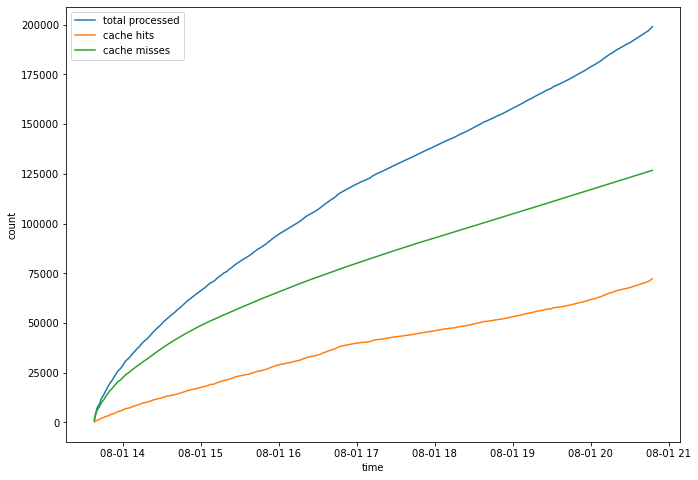

In [15]:
fig, ax = plt.subplots(figsize=(11, 8))
ax.plot(df["timestampDT"], df["total"], label="total processed")
ax.plot(df["timestampDT"], df["cachehits"], label="cache hits")
ax.plot(df["timestampDT"], df["cachemisses"], label="cache misses")
ax.legend()
ax.set_ylabel("count")
ax.set_xlabel("time")

In [16]:
pred_x = np.arange(0, 800000, 500).reshape(-1, 1)
pred_y = total_regression.predict(pred_x)
pred_y = [pred_y[i][0] for i in range(len(pred_y))]
pred_y = pd.to_datetime(pred_y)

Text(0.5, 0, 'time')

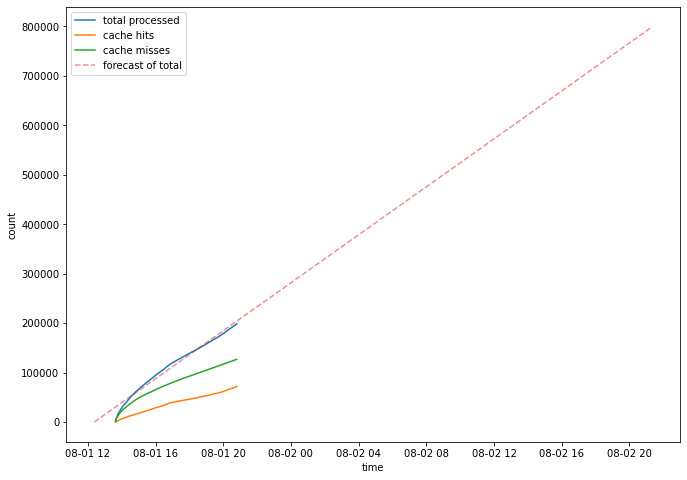

In [17]:
fig, ax = plt.subplots(figsize=(11, 8))
ax.plot(df["timestampDT"], df["total"], label="total processed")
ax.plot(df["timestampDT"], df["cachehits"], label="cache hits")
ax.plot(df["timestampDT"], df["cachemisses"], label="cache misses")
ax.plot(pred_y, pred_x, label="forecast of total", linestyle="--", alpha=0.5)
ax.legend()
ax.set_ylabel("count")
ax.set_xlabel("time")